<a href="https://colab.research.google.com/github/davidesqalv/landscape-field-classification-opencv/blob/main/landscape_field_classification_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls

indianpines.png  sample_data


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import copy

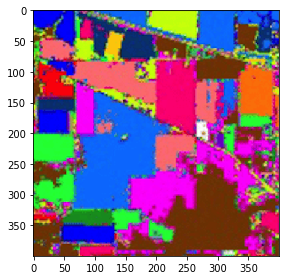

(400, 400, 4)


In [ ]:
from skimage import io,color
from google.colab import files
#Cargar la imagen
img = io.imread('indianpines.png')
#imprimir imagen real
io.imshow(img)
io.show()
print(np.shape(img))

# Pasar de RGB-A a RGB [link text](https://stackoverflow.com/questions/51923503/why-do-some-images-have-third-dimension-3-while-others-have-4/51931395)

In [ ]:
from PIL import Image
import numpy as np
img2=Image.open('indianpines.png')
# pasar a rgb
print(np.shape(img2))
#imgrgb = img2.convert('RGB')
#print(np.shape(imgrgb))
rgba = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
#print(np.shape(rgba))
print(rgba[50,300])
print(rgba[100,200])

(400, 400, 4)
[ 13 100 249]
[219  71  95]


# K means[link text](https://programmerclick.com/article/7836589502/)

In [ ]:
#primero se deben definir la cantidad de subgrupos de colores que se tienen 
#rosado hay como 4 tiposs
#cafe hay como 2 tonos
#4 tipos de azul
# rojo y naranja
#por lo tanto seran unos 12 colores




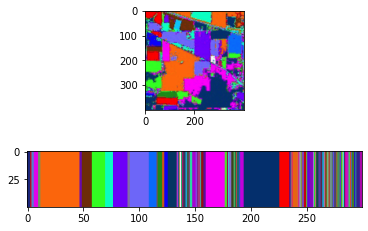

In [ ]:
# import the necessary packages
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import cv2 as cv
import numpy as np


def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()

    # return the histogram
    return hist


def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

# load the image and show it

image_base = cv.imread("indianpines.png")
image_base =cv2.cvtColor(image_base, cv2.COLOR_RGBA2RGB)#pasar a RGB


# reshape the image to be a list of pixels
image = image_base.reshape((image_base.shape[0] * image_base.shape[1], 3))
# con 25 sigue agrupando mal
k = 100 # Número de categorías agrupadas  
iterations = 4 # Número concurrente 4
# por defecto tenia 200 ciclos
iteration = 1000 # Número máximo de ciclos de agrupamiento

clt = KMeans(n_clusters = k, n_jobs = iterations, max_iter = iteration)
clt.fit(image)

hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)

# show our color bart
fig = plt.figure()
ax = fig.add_subplot(211)
ax.imshow(image_base)
ax = fig.add_subplot(212)
ax.imshow(bar)
plt.show()



In [ ]:
print(clt.cluster_centers_)
#print(np.shape(image_base))
#print(image_base[200,200])
#fig = plt.figure()
#ax = fig.add_subplot(211)
#ax.imshow(image_base)
#plt.show()
#print(clt.cluster_centers_[1])
#print(image_base)
print(image_base[10,10])
print(image_base[100,110])


print(image)



[[2.80901312e+01 3.86514546e+01 1.22294923e+02]
 [2.28602610e+02 3.40332147e+00 5.88612100e+00]
 [8.13915344e+01 1.29637566e+02 2.07010582e+02]
 [2.27358065e+02 2.47603687e+00 2.32735484e+02]
 [1.11187010e+02 1.51549832e+02 9.08510638e+01]
 [2.51345167e+02 1.01493531e+02 1.20596129e+01]
 [1.03902250e+02 9.88748242e+00 1.76432489e+02]
 [1.08427004e+02 4.49489476e+01 9.30989700e+00]
 [5.01366940e+01 2.53221587e+02 3.46491418e+01]
 [1.15120724e+01 2.52717052e+02 1.94181590e+02]
 [1.09780909e+02 1.17826529e-01 2.48464187e+02]
 [1.30590334e+02 1.08582278e+02 1.65535098e+02]
 [1.09345138e+02 1.02715926e+02 2.48643593e+02]
 [1.08864653e+01 1.05841443e+02 2.48957774e+02]
 [1.20953846e+02 8.39358974e+01 8.17243590e+01]
 [2.82091927e+01 1.37924573e+02 2.44236889e+01]
 [1.97252464e+02 8.94139500e+01 2.29279757e+01]
 [1.67167421e+02 1.65239819e+02 1.68927602e+02]
 [1.19497487e+01 8.40452261e-01 2.44035804e+02]
 [6.42981800e+00 5.41144353e+01 9.97743705e+01]
 [2.07176471e+02 4.43445378e+01 2.186050

## binarizar

Streaming output truncated to the last 5000 lines.
[  0  50 100]
[  0  49 103]
[  0  50 109]
[ 13  47 117]
[ 29  42 126]
[ 42  35 133]
[ 51  28 136]
[ 50  26 135]
[ 37  30 130]
[ 36  30 135]
[ 49  26 148]
[ 53  24 149]
[ 51  24 138]
[ 45  26 132]
[ 37  28 134]
[ 29  32 130]
[ 23  38 121]
[ 16  42 115]
[  9  43 115]
[  0  46 113]
[  3  48 108]
[  3  49 105]
[  2  48 103]
[  3  49 101]
[  4  52 100]
[  4  52 101]
[  3  49 104]
[  3  47 107]
[  4  47 108]
[  4  46 111]
[  4  44 114]
[  4  46 114]
[  5  49 111]
[  6  51 109]
[  6  51 109]
[  6  51 109]
[  5  51 109]
[  5  50 108]
[  5  48 107]
[  5  47 107]
[  3  47 109]
[  3  47 110]
[  4  46 110]
[  5  48 109]
[  6  50 108]
[  5  50 108]
[  3  48 108]
[  2  48 108]
[  2  50 109]
[  0  50 108]
[  0  47 105]
[  0  46 104]
[  0  47 106]
[  0  48 107]
[  0  47 109]
[  0  47 110]
[  0  46 110]
[  0  47 112]
[  0  47 115]
[  0  48 115]
[  0  51 114]
[  0  51 111]
[  0  49 106]
[  0  48 106]
[  0  47 110]
[  0  47 113]
[  0  49 114]
[  0  49 11

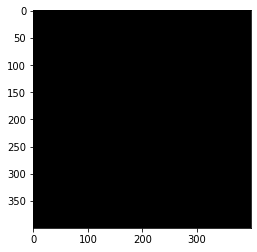

In [ ]:
import cv2
d=(np.shape(image_base))

imgbina=np.zeros((d[0],d[1]))

#print(imgbina)
for x in range(d[0]): #recorrer la matriz de la imagen
  for y in range(d[1]):
      v=image_base[x,y]#obtener el valor del pixel
      clouster=clt.cluster_centers_[2]
      print(v)
      if ((v[2]==clouster[2]) and (v[1]==clouster[1])and (v[0]==clouster[0])):#pixeles mapeados a color blanco
        imgbina[x,y]=255
      
plt.imshow(imgbina,'Greys_r')
plt.show()


Streaming output truncated to the last 5000 lines.
[  0  50 100]
[  0  49 103]
[  0  50 109]
[ 13  47 117]
[ 29  42 126]
[ 42  35 133]
[ 51  28 136]
[ 50  26 135]
[ 37  30 130]
[ 36  30 135]
[ 49  26 148]
[ 53  24 149]
[ 51  24 138]
[ 45  26 132]
[ 37  28 134]
[ 29  32 130]
[ 23  38 121]
[ 16  42 115]
[  9  43 115]
[  0  46 113]
[  3  48 108]
[  3  49 105]
[  2  48 103]
[  3  49 101]
[  4  52 100]
[  4  52 101]
[  3  49 104]
[  3  47 107]
[  4  47 108]
[  4  46 111]
[  4  44 114]
[  4  46 114]
[  5  49 111]
[  6  51 109]
[  6  51 109]
[  6  51 109]
[  5  51 109]
[  5  50 108]
[  5  48 107]
[  5  47 107]
[  3  47 109]
[  3  47 110]
[  4  46 110]
[  5  48 109]
[  6  50 108]
[  5  50 108]
[  3  48 108]
[  2  48 108]
[  2  50 109]
[  0  50 108]
[  0  47 105]
[  0  46 104]
[  0  47 106]
[  0  48 107]
[  0  47 109]
[  0  47 110]
[  0  46 110]
[  0  47 112]
[  0  47 115]
[  0  48 115]
[  0  51 114]
[  0  51 111]
[  0  49 106]
[  0  48 106]
[  0  47 110]
[  0  47 113]
[  0  49 114]
[  0  49 11

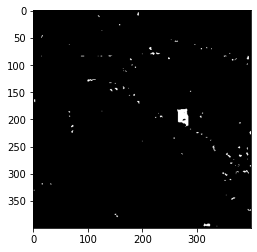

In [ ]:
import cv2
d=(np.shape(image_base))

imgbina=np.zeros((d[0],d[1]))

#print(imgbina)
for x in range(d[0]): #recorrer la matriz de la imagen
  for y in range(d[1]):
      v=image_base[x,y]#obtener el valor del pixel
      clouster=clt.cluster_centers_[2]
      print(v)
      if ((v[2]>clouster[2]) and (v[1]>clouster[1])and (v[0]>clouster[0])):#pixeles mapeados a color blanco
        imgbina[x,y]=255
      
plt.imshow(imgbina,'Greys_r')
plt.show()

# k means 2[link text](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html)

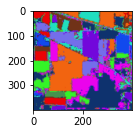

In [ ]:
import numpy as np
import cv2

#img = cv2.imread('home.jpg')
image_base = cv.imread("indianpines.png")
img =cv2.cvtColor(image_base, cv2.COLOR_RGBA2RGB)#pasar a RGB
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 1000, 1.0)
K = 12
ret,label,center=cv2.kmeans(Z,K,None,criteria,100,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))


fig = plt.figure()

ax = fig.add_subplot(212)
ax.imshow(res2)
plt.show()

In [ ]:
print(center)
print(label)
print(np.shape(label))

[[114   7 219]
 [147  74 127]
 [ 32 222 192]
 [234   3   6]
 [ 52 244  39]
 [116 110 234]
 [112  50  24]
 [ 17  73 238]
 [ 71 146  78]
 [235   3 236]
 [ 14  50 110]
 [242 100  16]]
[[ 3]
 [ 3]
 [ 3]
 ...
 [10]
 [10]
 [10]]
(160000, 1)


In [ ]:
import cv2
d=(np.shape(res2))

imgbina=np.zeros((d[0],d[1]))

#print(imgbina)
for x in range(d[0]): #recorrer la matriz de la imagen
  for y in range(d[1]):
      v=label[x,y]#obtener el valor del pixel
      print(v)
      if ((v==1)):#pixeles mapeados a color blanco
        imgbina[x,y]=255
      
plt.imshow(imgbina,'Greys_r')
plt.show()

5


IndexError: ignored

# kmeans3[link text](https://www.thepythoncode.com/article/kmeans-for-image-segmentation-opencv-python)

In [ ]:
#librerias requeridas
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io,color

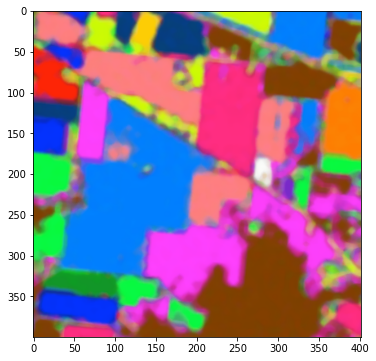

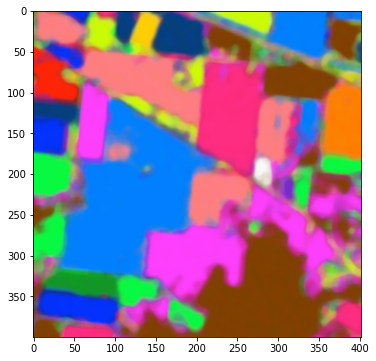

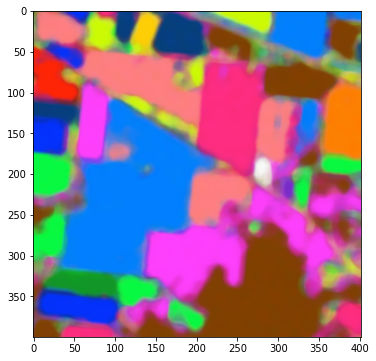

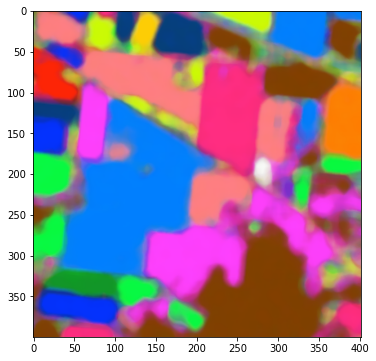

In [ ]:
#Filtro Media
# img = io.imread('indianpines.png') #leer la imagen
img = io.imread('indianpinesTEST03.png') #leer la imagen
#img = io.imread('indianpines_rotated.png') #leer la imagen
#print(np.shape(img))
image= cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)# pasar la imagen a RGB
#print(np.shape(image))
for k in (9, 11, 13, 15): 
  # aplicar el filtro con los tamaños de kernel seleccionados
  blurred = cv2.medianBlur(image, k)
  plt.figure(figsize=(6,6))
  plt.imshow(blurred)
  plt.show()
  # cv2.waitKey(0)

13


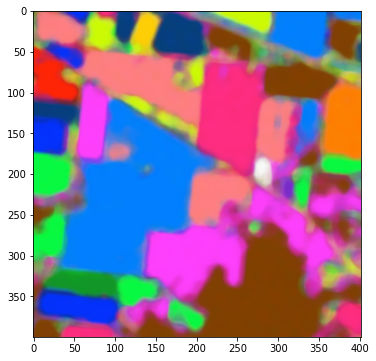

In [ ]:
#ajuste del tamaño del filtro
kernel_size = int(0.0325*image.shape[0])
if kernel_size % 2 == 0:
  kernel_size += 1
print(kernel_size)

img_blur = cv2.medianBlur(image, kernel_size)# aplicar el filtro de mediana con un tamaño de 13
plt.figure(figsize=(6,6))
plt.imshow(img_blur)
plt.show()

In [ ]:
# image = cv2.imread("indianpines.png")
# image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)

# pasar la imagen a un array 2d, y pasa la imagen a RGB
pixel_values = img_blur.reshape((-1, 3))
#convierte a flotante la variable pixel_values
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

(160800, 3)


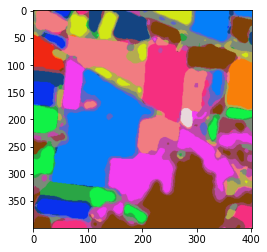

In [ ]:
#Segmentacion K-means
#criterio de parada
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2) #100 iteracciones maximo, 0.2 de presicion
k = 18 # numero de centroides(clasificaciones)
#aplicar el k-means
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# convertir la variable centers en 8 bits
centers = np.uint8(centers)

# obtener la matriz de etiquetas
labels = labels.flatten()
# cambiar ell vaolor del pixel por el valor del centroidide
segmented_image = centers[labels.flatten()]
# dimensionar la imagen a sus dimenciones originales
segmented_image = segmented_image.reshape(image.shape)
# Imprimir la imagen
plt.imshow(segmented_image)
plt.show()





areas
[5942, 9888, 21848, 636, 15133, 5797, 4156, 4801, 10917, 6384, 9104, 2232, 3715, 16755, 24073, 9217, 4379, 5823]
[ 3 11 12  6 16  7  5 17  0  9 10 15  1  8  4 13  2 14]


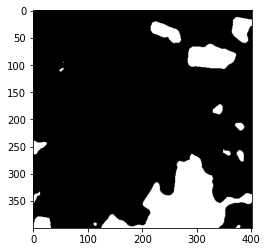

In [ ]:
# DETERMINAR LA CLASIFICACION DE INTERES
masked_image = np.copy(image)
# pasar la imagen a un array 2d de nuevo
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable

areas = []

#determinar el clusster que tenga el segundo mayor cantidad de puntos
#determinar el area de cada cluster
for i in range(k):

  cluster=i
  z=np.shape(masked_image[labels == cluster])
  areas.append(z[0])

#imprimir las areas y el numero de cluster
print('areas')
print(areas)
indices = np.argsort(np.array(areas))
print(indices)

#El cluster de interes se imprime en color blanco y los demas cluster en negro
for i in range(k):
  cluster=i
  z=np.shape(masked_image[labels == cluster])

  if i==(indices[-2]):
  # if i==1:
    masked_image[labels == cluster] = [255, 255, 255]
  else:
    masked_image[labels == cluster] = [0, 0, 0]

# convertir la imagen a sus dimensiones originales
masked_image = masked_image.reshape(image.shape)
# mostrar la imagen
plt.imshow(masked_image)
plt.show()

# Transformada[link text](https://programmerclick.com/article/70141088771/)*italicized text*

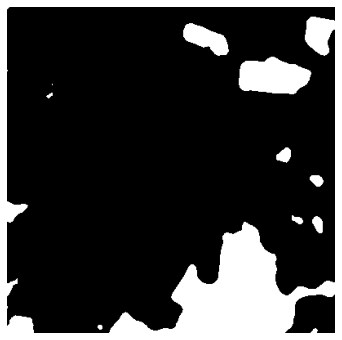

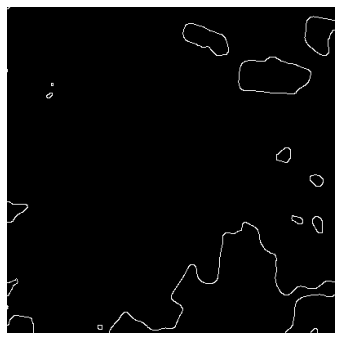

In [ ]:
#importar librerias
import cv2
import numpy as np
 
# copiar la imagen y definirla como escala de grises
gray = np.copy(masked_image)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#aplicar el filtro canny
edges = cv2.Canny(gray,50,150,apertureSize = 7)
#imprimir los resultados
plt.figure(figsize=(6,6))
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()


#hough transform
# lines = cv2.HoughLines(image_gray,1,np.pi/180,50)#73 es el menor numero con que funciona
# minLineLength = 10
# maxLineGap = 1
# lines = cv2.HoughLinesP(edges,1,np.pi/180,10,minLineLength,maxLineGap)
# print(lines)
# print(lines[0])

# edges_lines = copy.deepcopy(image_gray)

# for line in lines:
#     [x1,y1,x2,y2] = line[0]
#     cv2.line(edges_lines,(x1,y1),(x2,y2),(0,255,0),2)

# for rho,theta in lines[0]:
#     a = np.cos(theta)
#     b = np.sin(theta)
#     x0 = a*rho
#     y0 = b*rho
#     x1 = int(x0 + 1000*(-b))
#     y1 = int(y0 + 1000*(a))
#     x2 = int(x0 - 1000*(-b))
#     y2 = int(y0 - 1000*(a))

#     cv2.line(edges_lines,(x1,y1),(x2,y2),(0,255,0),2)


# plt.figure(figsize=(6,6))
# plt.imshow(edges_lines)
# plt.axis('off')
# plt.show()

shape (400, 402, 3)
6.0
24.5
21.5
9.5
2.0
14.5
7.0
125.5
188.0
174.0
91.5
83.5
19.5
173.5
156.5
232.5
217.5
30.5
21.5
6.0
4.0
0.0
3046.5
3010.5
1256.0
1230.0
25.0
2.5
mayor 3046.5
174.0


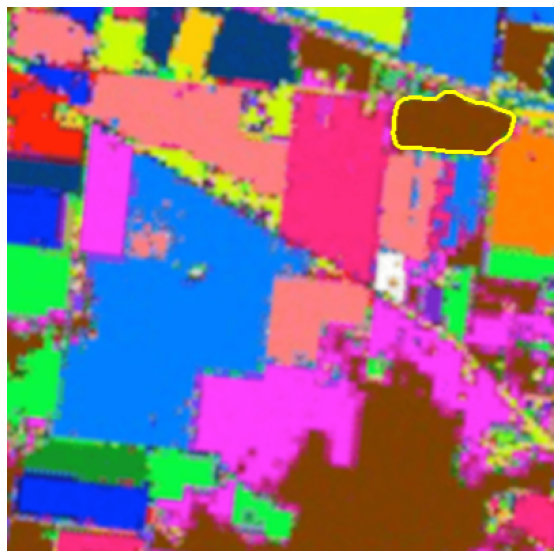

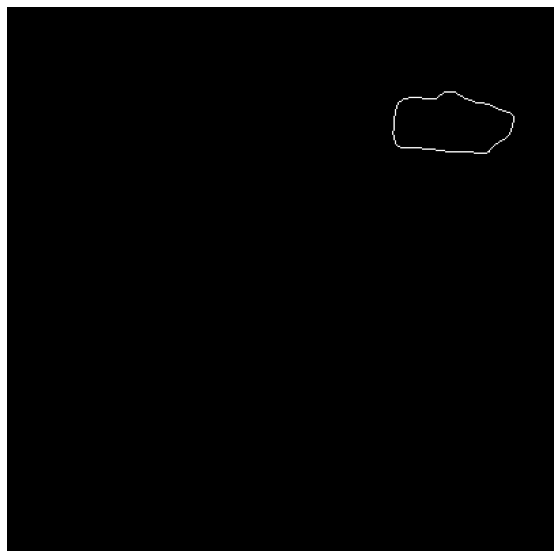

In [ ]:
#obtener los contornos 
contours, hierarchy = cv2.findContours(image=edges, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)                                      


# copiar las imagenes a otras variables
image_copy = image.copy()
binario_copy = edges.copy()

regiones = []

print(f'shape {image_copy.shape}')

mayor = []
area_mayor = 0
#determinar el contorno con mayor area
for contour in contours:
  area = cv2.contourArea(contour)
  print(area)
  if area > area_mayor:
    area_mayor = area
    mayor = contour
  if area > 100:
    regiones.append(contour)

print(f'mayor {area_mayor}')

# for r in regiones:
#   area = cv2.contourArea(r)
#   print(area)
#imprimir el contorno con mayor area en la imagen
print(cv2.contourArea(regiones[2]))
cv2.drawContours(image=image_copy, contours=mayor, contourIdx=-1, color=(255, 255, 0), thickness=2, lineType=cv2.LINE_AA)

plt.figure(figsize=(10,10))
plt.imshow(image_copy, cmap='gray')
plt.axis('off')
plt.show()

mask = np.zeros(image_copy.shape, np.uint8)
# mask = np.zeros(image_copy.shape)
cv2.drawContours(mask, mayor, -1, (0,255,0), -1)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()



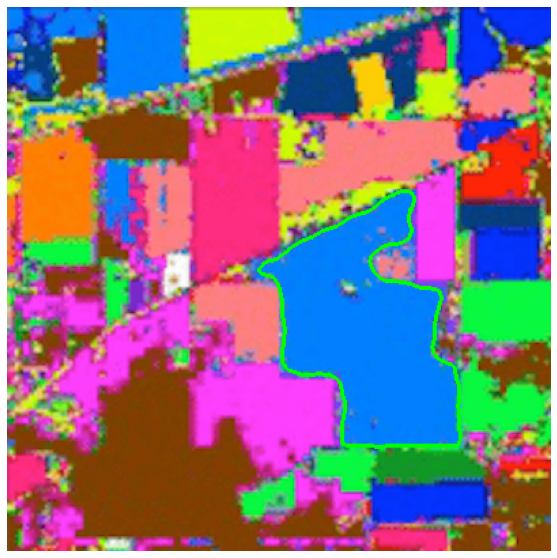

In [ ]:
#Aplicar transformada de Hough probabilistica

minLineLength = 100# distancia minima de la linea
maxLineGap = 0.5#espacio maximo permitido de distancia, entre puntos de la misma linea
lines = cv2.HoughLinesP(mask,1,np.pi/180,1,minLineLength,maxLineGap)#aplicar la transformada

#edges_lines = copy.deepcopy(image_gray)
edges_lines = image.copy()
#imprimir las lineas en la imagen original
for line in lines:
    [x1,y1,x2,y2] = line[0]
    cv2.line(edges_lines,(x1,y1),(x2,y2),(0,255,0),2)

plt.figure(figsize=(10,10))
plt.imshow(edges_lines)
plt.axis('off')
plt.show()